<a href="https://colab.research.google.com/github/ishita-tripathi226/SP/blob/main/SalaryPredictionIT_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import numpy as np
import pandas as pd
import gradio as gr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [272]:
df = pd.read_csv("Salary Data.csv", sep = "\t")

In [273]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


Data Cleaning

In [274]:
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [276]:
df.shape

(375, 6)

In [277]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [278]:
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


In [279]:
df = df.dropna()

In [280]:
df = df.drop_duplicates()

In [281]:
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [282]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [283]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [284]:
df["Education Level"] = df["Education Level"].fillna(df["Education Level"].mode()[0])

In [285]:
df["Job Title"] = df["Job Title"].fillna(df["Job Title"].mode()[0])

In [286]:
df["Years of Experience"] = df["Years of Experience"].fillna(df["Years of Experience"].mean())

In [287]:
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())

In [288]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [289]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


Outlier

In [290]:
q1=df['Years of Experience'].quantile(0.25)
q3=df['Years of Experience'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
df[(df['Years of Experience']<lower)|(df['Years of Experience']>upper)]
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


EDA

In [291]:
import matplotlib.pyplot as plt

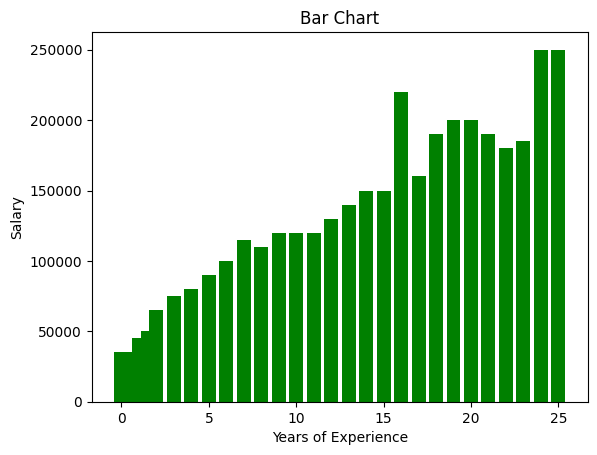

In [292]:
plt.bar(df['Years of Experience'],df['Salary'],color="green")
plt.title("Bar Chart")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

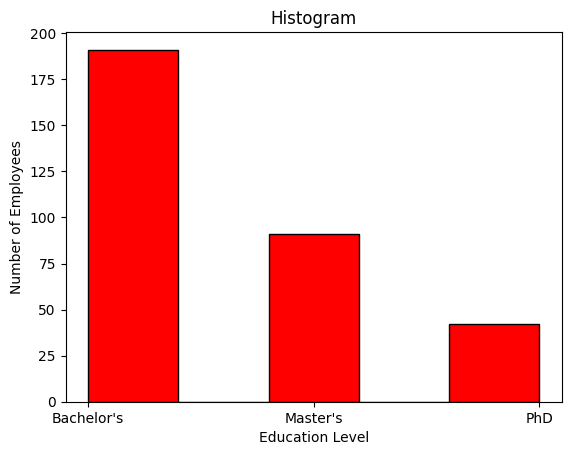

In [293]:
plt.hist(df["Education Level"], bins = 5, color = "red", edgecolor = "black")
plt.title("Histogram")
plt.xlabel("Education Level")
plt.ylabel("Number of Employees")
plt.show()

In [294]:
df["Education Level"].describe()

,Education Level
count,324
unique,3
top,Bachelor's
freq,191


In [295]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


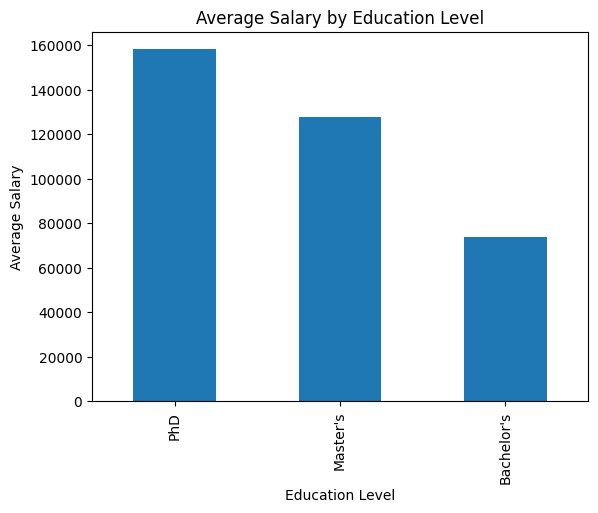

In [296]:
df.groupby("Education Level")["Salary"].mean().sort_values(ascending= False).head(7).plot(kind = "bar")
plt.title("Average Salary by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Salary")
plt.show()


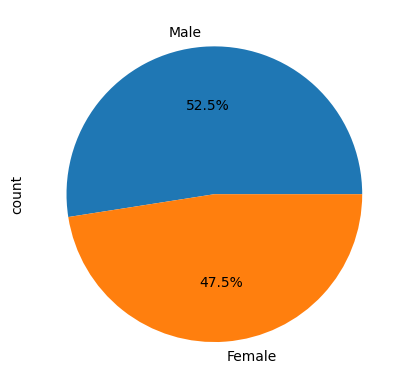

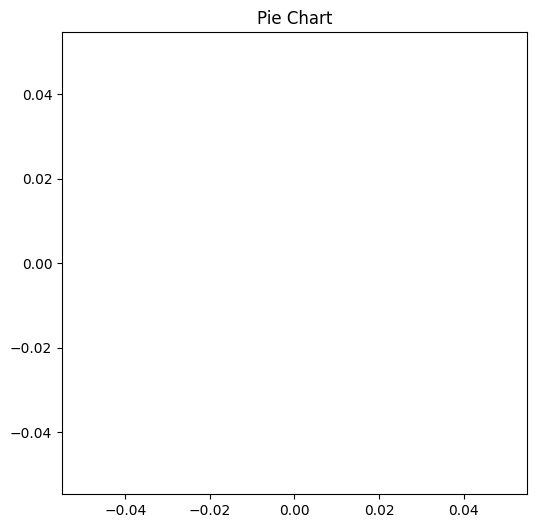

In [297]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.figure(figsize=(6,6))
plt.title("Pie Chart")
plt.axis('equal')
plt.show()

In [298]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


In [299]:
from sklearn.preprocessing import OneHotEncoder

In [300]:
X = df.drop("Salary", axis = 1)
Y = df["Salary"]

categorical_data = ["Gender", "Education Level", "Job Title"]


In [301]:
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Director,20.0
...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0
350,44.0,Female,PhD,Senior Data Scientist,16.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0


In [302]:
Y

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
348,35000.0
349,110000.0
350,160000.0
351,55000.0


In [303]:
gender = ["Male", "Female"]

gender = [1, 0]


color = ["Green", "Blue", "Red", "Yellow"]
color = [0, 1, 2, 4]

In [304]:
from sklearn.preprocessing import OrdinalEncoder

In [305]:
encoder = OrdinalEncoder()

In [306]:
X_encoder = X.copy()
X_encoder[categorical_data] = encoder.fit_transform(X[categorical_data])

In [307]:
X_encoder

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1.0,0.0,159.0,5.0
1,28.0,0.0,1.0,17.0,3.0
2,45.0,1.0,2.0,130.0,15.0
3,36.0,0.0,0.0,101.0,7.0
4,52.0,1.0,1.0,22.0,20.0
...,...,...,...,...,...
348,28.0,0.0,0.0,68.0,1.0
349,36.0,1.0,0.0,111.0,8.0
350,44.0,0.0,2.0,115.0,16.0
351,31.0,1.0,0.0,63.0,3.0


In [308]:
uniq = df["Job Title"].unique()


In [309]:
uniq

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [310]:
uniq1 = X_encoder["Job Title"].unique()

In [311]:
uniq1

array([159.,  17., 130., 101.,  22.,  81.,  93., 104.,  82., 150., 158.,
        40.,  36.,  96.,  13.,  89.,  83., 116.,  18., 102.,   3., 172.,
        44.,  98.,  37., 157., 160.,  57., 112.,  92.,   6.,   1.,  19.,
        84., 167.,  39.,  95.,  16., 103., 169.,  88.,  85.,   2., 162.,
        10.,   0.,  29.,  41.,  12.,   5.,  34., 171.,  38., 170., 156.,
        30., 115.,  47.,  21.,  43.,  14.,   4., 118., 173.,  99., 166.,
        11., 153.,  42.,   9., 165., 106.,   8.,  56.,  35.,  46., 144.,
        91., 164., 134., 168., 100.,  76.,  97.,  87.,  94., 122.,  80.,
       143.,   7.,  20.,  45., 131.,  15., 120., 161., 163., 110.,  62.,
        86.,  90.,  61., 141.,  66., 121., 105., 152.,  79., 154., 146.,
        73.,  64.,  54., 142.,  49., 148.,  65.,  70., 109.,  32.,  71.,
       111., 139.,  53., 129.,  59., 138.,  28.,  77., 149.,  31.,  52.,
       132., 125.,  50., 108., 147.,  60.,  25.,  63.,  55., 136., 124.,
       155.,  69., 135., 128., 145.,  33., 107.,  2

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoder,Y, test_size = 0.2, random_state = 42)

In [314]:
from sklearn.ensemble import RandomForestRegressor

In [315]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [316]:
rf_pre = rf.predict(X_test)

In [317]:
rf_pre

array([105700.        , 118800.        ,  48950.        , 115600.        ,
       103300.        , 101450.        ,  49500.        ,  53226.66666667,
       174300.        ,  46750.        ,  40100.        , 123400.        ,
       106150.        , 152950.        ,  97950.        , 174700.        ,
       110100.        , 100600.        ,  53283.33333333,  40450.        ,
        89483.33333333,  60600.        ,  58650.        ,  48400.        ,
       161050.        ,  95350.        , 148900.        , 169750.        ,
       161850.        ,  36650.        ,  98050.        , 175650.        ,
       110000.        , 149700.        , 141000.        ,  45883.75      ,
        85550.        ,  66650.        ,  99550.        ,  36153.5       ,
       112550.        ,  48700.        , 116800.        ,  56370.        ,
        42000.        ,  49700.        , 121050.        ,  40000.        ,
       151400.        ,  90950.        , 146300.        ,  42000.        ,
        57200.        ,  

In [318]:
from sklearn.metrics import mean_absolute_error

In [319]:
rf_mean = mean_absolute_error(Y_test, rf_pre)

In [320]:
rf_mean

9315.803846153845

In [321]:
new_data = pd.DataFrame({
    "Age" : [40],
    "Gender" : ["Male"],
    "Education Level" : ["PhD"],
    "Job Title" : ["Software Engineer"],
    "Years of Experience" : [10],
})

In [322]:
new_data1 = new_data.copy()
new_data1[categorical_data] = encoder.fit_transform(new_data1[categorical_data])

In [323]:
predict_sal = rf.predict(new_data1)[0]

In [324]:
predict_sal

np.float64(59250.0)

UI

In [325]:
!pip install gradio

In [326]:

import gradio as gr

# Function for salary prediction
def predict_salary(age, gender, education, job, experience):
    # Prepare input data
    new_data = pd.DataFrame({
        "Age": [age],
        "Gender": [gender],
        "Education Level": [education],
        "Job Title": [job],
        "Years of Experience": [experience]
    })

    # Encode categorical data using the same encoder
    new_data1 = new_data.copy()
    new_data1[categorical_data] = encoder.transform(new_data1[categorical_data])

    # Predict salary
    salary = rf.predict(new_data1)[0]
    return "Predicted Salary: {:.2f}".format(salary)

# Get options from dataset
gender_options = df["Gender"].unique().tolist()
education_options = df["Education Level"].unique().tolist()
job_options = df["Job Title"].unique().tolist()

# Build UI
with gr.Blocks() as demo:
    gr.Markdown("## 💼 Salary Prediction App")

    with gr.Row():
        age = gr.Number(label="Age", value=30)
        exp = gr.Number(label="Years of Experience", value=5)

    gender = gr.Dropdown(choices=gender_options, label="Gender", value=gender_options[0])
    education = gr.Dropdown(choices=education_options, label="Education Level", value=education_options[0])
    job = gr.Dropdown(choices=job_options, label="Job Title", value=job_options[0])

    predict_btn = gr.Button("Predict Salary")
    output = gr.Textbox(label="Prediction Result")

    predict_btn.click(fn=predict_salary,
                      inputs=[age, gender, education, job, exp],
                      outputs=output)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://222d0b91ed273c7d57.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
